In [7]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'

from IPython.display import Image

import pandas as pd

import re

In [1]:
rooms_set = {"DINING ROOM", "KITCHEN", "LIVING ROOM", "BEDROOM 1", "BEDROOM 2", "BEDROOM 3", "MASTER BEDROOM"}

In [5]:
room = []
side_a = []
side_b = []
size = []

In [8]:
room_sides_regex = re.compile('[0-9][.][0-9][0-9][M]\s[X]\s[0-9][.][0-9][0-9][M]')

In [9]:
floorplan_text = pytesseract.image_to_string('plans/floorplan_02.png')
floorplan_text = floorplan_text.upper()
floorplan_text = floorplan_text.replace("\n", "")
floorplan_text = floorplan_text.strip()
floorplan_text

'GROUND FLOOR425 SQ.FT. (39.5 SQ.M.) APPROX.KITCHEN/DINER15°7" X 11\'8"4.74M X 3.55MSITTING ROOM12\'1" X 15\'7"3.69M X 4.74MBEDROO71" X G\'5"OR424 SQ.FT. (39.4 SQ.M.) A32SMASTER BEDROOMNAE X TH 8"3.1 2.95MBEDROOM 28\'1" X 12\'0"2.47M X 3.66MM32.17M X 2.56MTOTAL FLOOR AREA: 849 SQ.FT. (78.9 SQ.M.) APPROX. WHILST EVERY ATTEMPT HAS BEEN MADE TO ENSURE THE ACCURACY OF THE FLOORPLAN CONTAINED HERE, MEASUREMENTSOF DORS, WINDOWS, ROOMS AND ANY OTHER TEMS ARE APPROXIMATE AND NO RESPONSIBILTY IS TAKEN FOR ANY EROR,ERUSSION OR MISSTATEMENT. THIS PLAN FOR MUSTAIVA PUSPOESE NLY ACL SHOULDBE WSOD AX SUCH BY ANYPROSPECTIVE PURCHASER. THE SERVICES, SYSTEMS AND APPLIANCES SHOWN HAVE N N TESTED AND NO GUARANTAS TO THEIR OPERABILITY OR EFFICIENCY CAN BE GIV ENHAE WITH METROPIX ©2020'

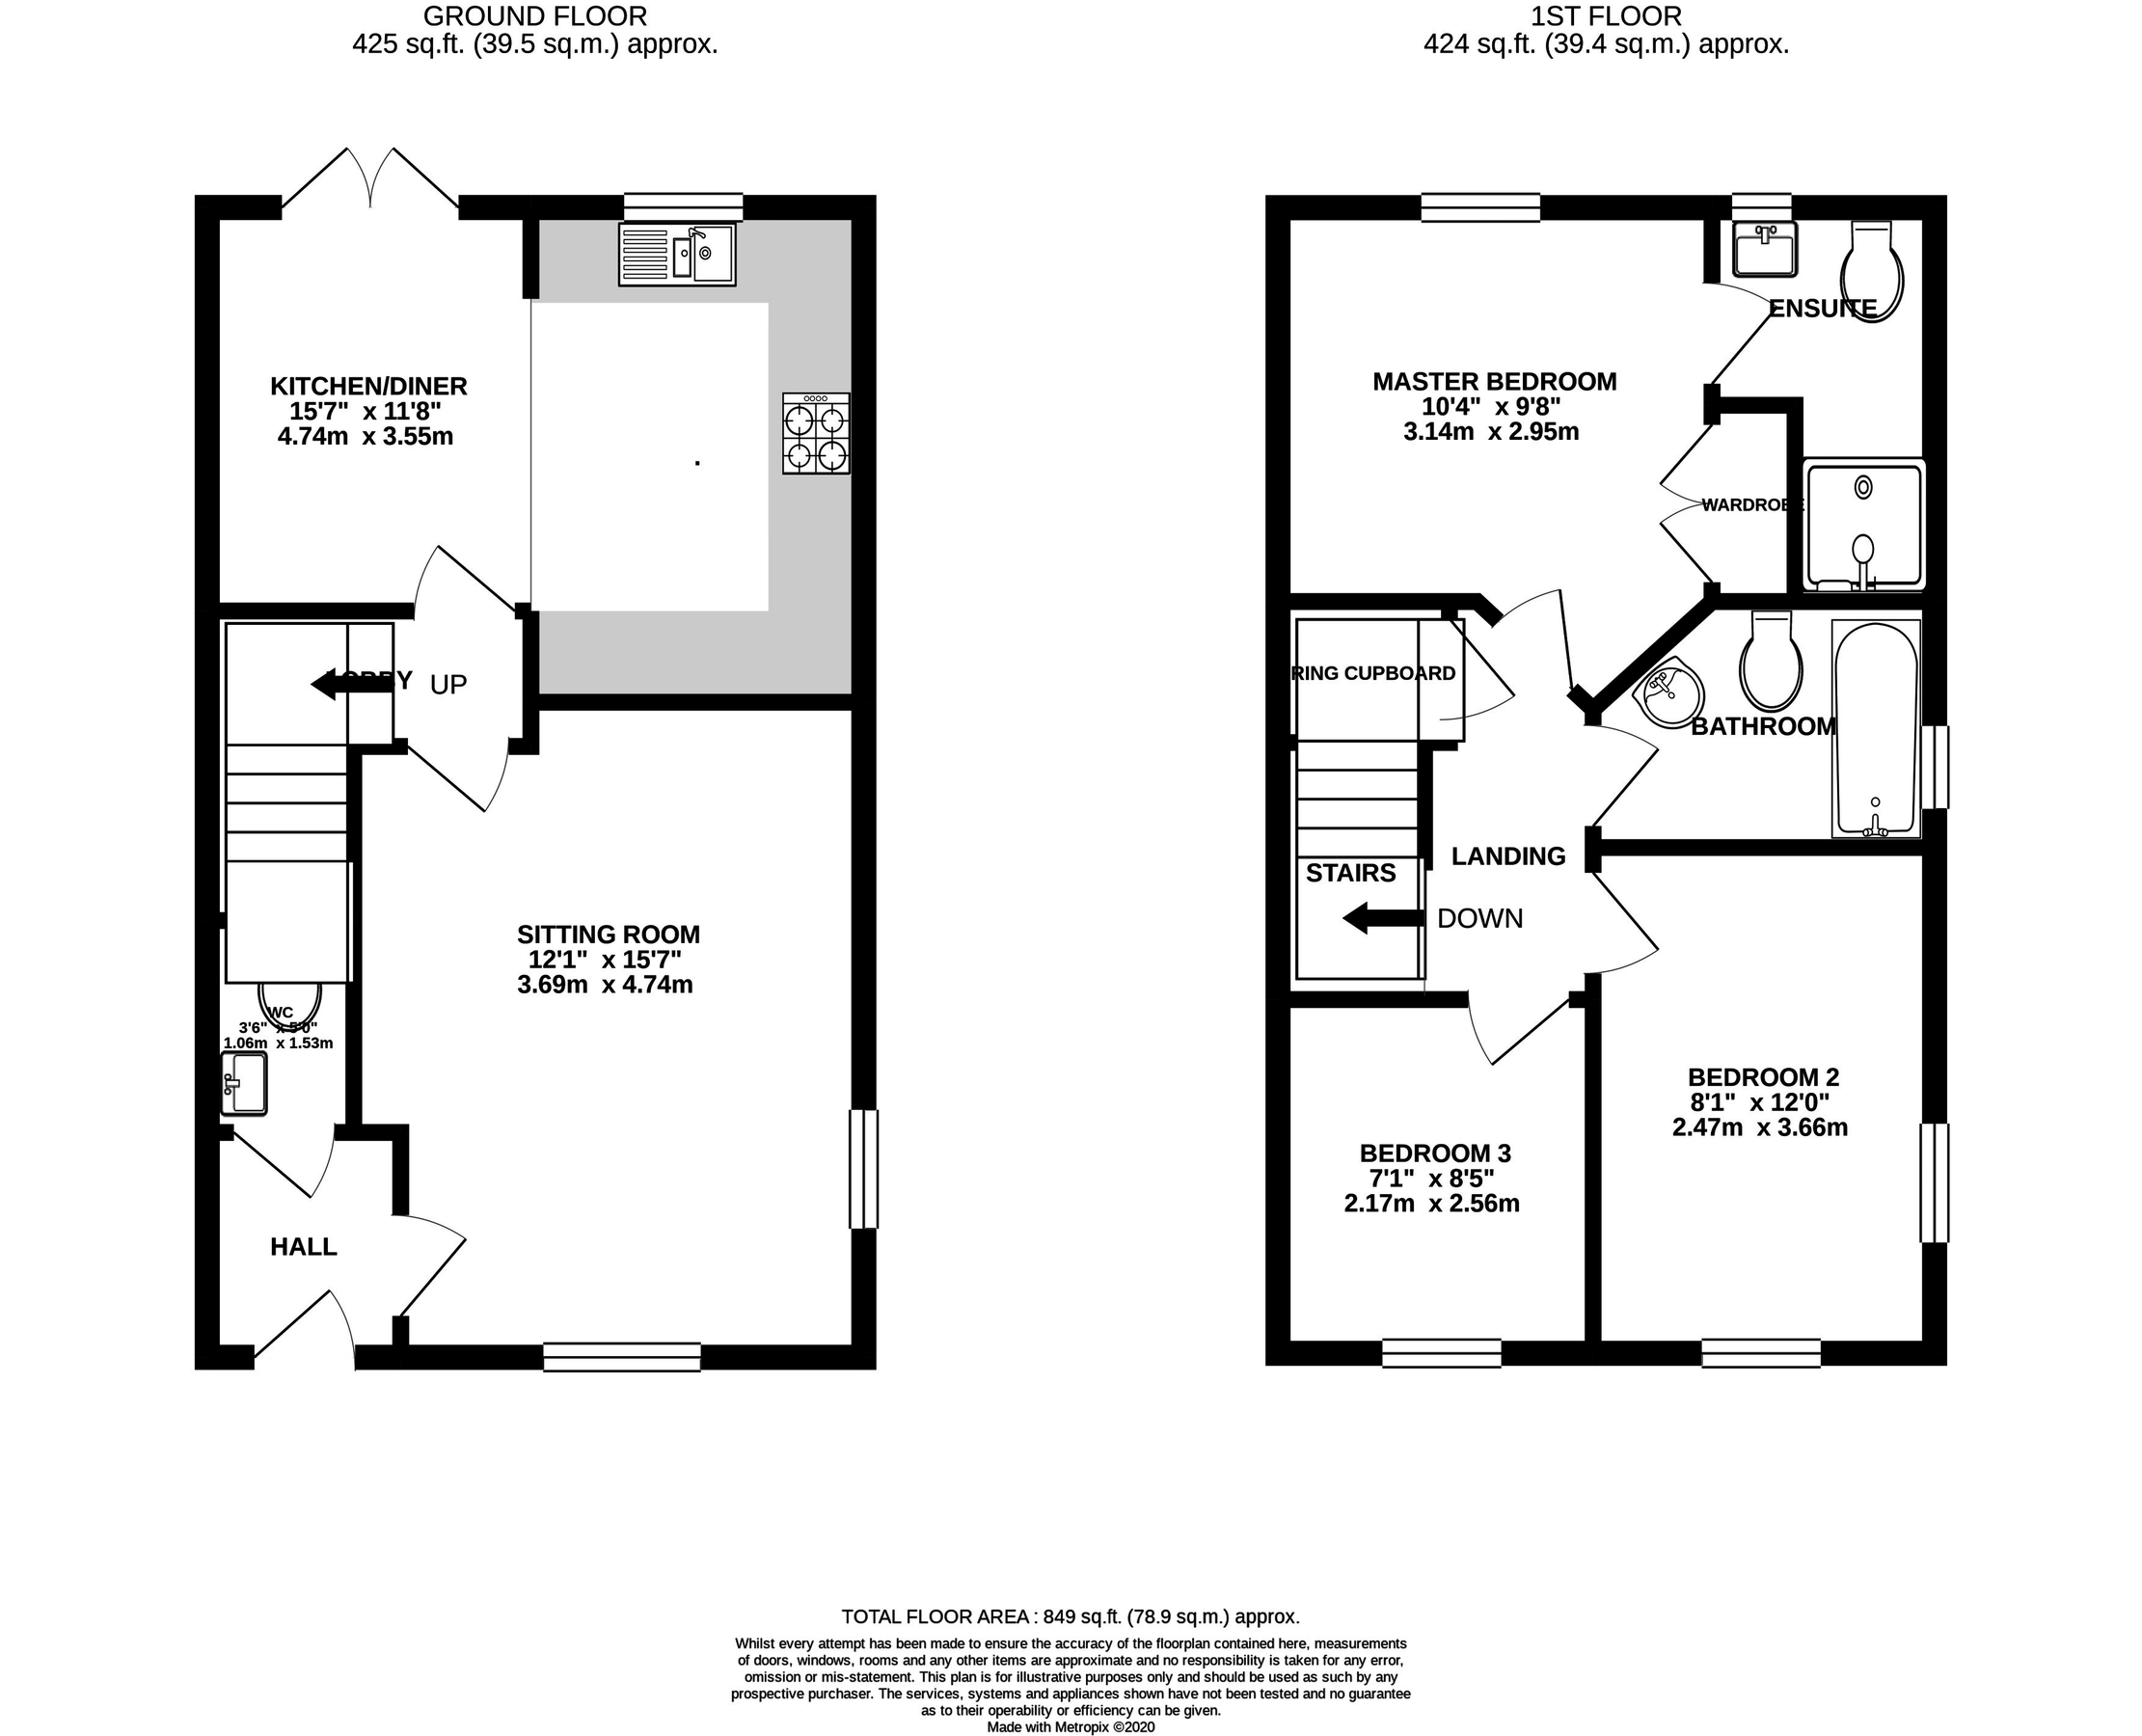

In [12]:
Image(filename = 'plans/floorplan_02.png')

In [10]:
# rooms with exact sizes
for curr_room in rooms_set:
    position = floorplan_text.find(curr_room)
    if position != -1:
        # removes the room from the text
        floorplan_text = floorplan_text[:position] + floorplan_text[position + len(curr_room):]
        room.append(curr_room)
        # find the next m pair
        room_sides_search = room_sides_regex.search(floorplan_text[position:])
        curr_side_a = float(room_sides_search.group()[:4])
        curr_side_b = float(room_sides_search.group()[8:-1])
        side_a.append(curr_side_a)
        side_b.append(curr_side_b)
        size.append(round(curr_side_a * curr_side_b,2))
        # removes the sides from the text
        floorplan_text = floorplan_text[:position + room_sides_search.span()[0]] + \
            floorplan_text[position + room_sides_search.span()[1]:]
        

In [11]:
room

['MASTER BEDROOM', 'BEDROOM 2', 'KITCHEN']

In [2]:
import floorplan_reader_01

In [3]:
table = floorplan_reader_01.convert_floorplan_string_to_table('plans/floorplan_01.jpeg', rooms_set)

In [4]:
table

,side_a,side_b,size
BEDROOM 2,3.45,2.72,9.38
KITCHEN,2.74,2.56,7.01
BEDROOM 3,2.71,2.37,6.42
DINING ROOM,3.24,2.72,8.81
BEDROOM 1,3.62,3.42,12.38
LIVING ROOM,4.18,3.51,14.67
